# A k-armed Bandit Problem
by __Shivangi Agarwal and Sandeep Banik__ | Reinforcement Learning

In a __k-armed bandit__ problem, at every time step the user is faced with a choice of picking one action or choice from $k$ possible actions or options. Each action chosen leads to a reward which is governed by an underlying probability distribution. The objective is to maximize the expected total reward acquired over a given possible time period. 
Conventionally the k armed bandit is viewed as $k$ arms/levers on a single slot machine, and we as the user want to maximize our total reward over given $N$ possible games. An illustration of a _k-armed bandit_ is as shown in the figure below. 

<img src="RL-k-armed-bandit.png">

_Note_ that the distribution shown is Gaussian distribution. However, it can be any general distribution. The slot machine games starts with $time = 1$, where we play the first game, followed by the second game at $time = 2$ and so on till time = $N$. Here, the time instants represent the $i$th game over $N$ games. We as the user want to ideally pick the arms so as to gain maximum reward (jackpots) over $N$ games played. 

<img src="RL-k-armed-bandit-N-steps.png">

Each action/lever of the possible $k$ levers provide an expected reward. The expected $\textit{value}$ at the time $t$ of such an action _(a)_ is given by $q_{*}(a)$ defined as,

$q_{*}(a) = E[R_{t} | A_{t} = a]$,

where $R_{t}$ is the reward at a given time $t$ and $A_{t}$ is the action at the time $t$. However, as shown in the figures above we see that we don't know these distributions and therefore we cannot determine the expected value for a given action $a$.
Based on the games being played we can estimate the value of such actions taken which is given by $Q_{t}(a)$, and ideally we want this to be as close to $q_{*}(a)$. 

## Exploration vs Exploitation

At any given time, if estimates of the set of actions are known, and subsequently we choose the one which provides us with largest reward (greedy) it is said that we have $\textit{exploited}$ the knowledge of system. However, if any non-greedy action is chosen, we classify it as exploring the system. Non-greedy actions can enable us to explore and achieve a better estimates of all the set of actions. This is illustrated in the figure below. Though there is a trade-off between exploration and exploitation. Exploitation maybe beneficial in the short run, however it might be better to explore in the long run. 

<img src="k-armed-bandit-exploitation.png">

<img src="k-armed-bandit-exploration.png">

## Action Value Methods

The range of methods which use the value of the estimates to make decisions (actions) is collectively called __action value methods__.
The natural way of computing the average value at the time $t$ for a given action $a$ is given as,

$$
\large
\begin{equation}
Q_{t}(a) = \frac{\text{Sum of the rewards when chosen the action a before the time t}}{\text{Number of times action a is chosen}}\\
{Q_{t}(a) = \frac{\sum_{i=1}^{t-1} R_{i}.I_{A_{t=a}}}{\sum_{i=1}^{t-1}I_{A_{t=a}}}}
\end{equation}
$$

Where $I$ is the indicator variable corresponding to 1 when the action $a$ was chosen and 0 therwise. When the numerator is zero then $Q_{t}$ takes some default value, and when it goes to infinity, $Q_{t}$ converges to $q_{*}$ by law of large numbers.

After estimating $Q$ the greedy action is given as,
$$
A_{t} = arg \max_{a} \ Q_{t}(a)
$$
This greedy action exploits the system from learned estimates. 
An alternative of the greedy action is to choose a random action once in a while with a probability of $\epsilon$. Such methods are called __$\epsilon$-greedy__ methods.

## Incremental Implementation

The estimates $Q$ at any given time instant $n$ is given by,

$
\begin{equation*}
\begin{split}
Q_{n+1} & = \frac{1}{n}\sum_{i=1}^{n}R_{i} \\
& = \frac{1}{n} \left \{ R_{n} + \sum_{i=1}^{n-1}R_{i} \right \} \\
& = \frac{1}{n} \left \{ R_{n} + (n-1)\frac{1}{n-1}\sum_{i=1}^{n-1}R_{i} \right \} \\
& = \frac{1}{n} \left \{ R_{n} + (n-1)Q_{n} \right \} \\
& = \frac{1}{n} \left \{ R_{n} + nQ_{n} - Q_{n} \right \} \\
& = Q_{n} + \frac{1}{n} \left \{ R_{n} - Q_{n} \right \} \\
\end{split}
\end{equation*}
$

The update is simply given as,

$
\text{New_Estimate} = \text{Old_Estimate} + \text{Step_Size}\left \{\text{Target} - \text{Old_Estimate} \right \}
$

## Pseudo Algorithm

Let $N(a)$ be the number of times the action $a$ was chosen.

Initialization: For all the set of actions i.e., $a=1$ to $k$,

$
\begin{equation*}
\begin{split}
Q(a) \leftarrow 0 \\
N(a) \leftarrow 0 \\
\text{Loop forever:} \\
& \text{action probability} \leftarrow \text{sample from [0,1)} \\
& A = \begin{cases} arg \max_{a} Q_{a} \quad \text{if action probability} \geq \epsilon \\ \text{random action} \quad \text{otherwise} \end{cases} \\
& R \leftarrow \textit{bandit(A)} \\
& N(A) \leftarrow N(A) + 1 \\
& Q(A) \leftarrow Q(A) + \frac{1}{n}[R(A) - Q(A)]\\
\end{split}
\end{equation*}
$

Here, a bandit refers to the process/machine which takes in the action and gives the reward. For practial purposes, loop is terminated after convergence is achieved. 

# The 10-armed bandit

To provide a working code of the above theory, we test the algorithm in a 10 armed bandit condition. 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#%%Initialisations
#total number of bandit arms
n = 10

#total number of experiments
t = 1000

#probability of random exploration(fraction)
epsilon = []
epsilon = [0,0.01,0.1]

#number of bandits(episodes)
bandit_number = 2000

#current value estimate of action
Q = np.zeros((bandit_number,n)) 

#number of times an action was chosen for each bandit
N = np.zeros((bandit_number,n)) 

#optimal action that should be chosen for each bandit
a_opt = np.zeros((bandit_number,n)) 


Q_star = np.random.normal(loc=0,scale=1,size=(bandit_number,n))

#cumulative reward at each episode for chossing an action by probability epsilon
avg_reward = np.asmatrix(np.zeros((len(epsilon),t)))


opt_act = np.asmatrix(np.zeros((len(epsilon),t)))

#function Bandit taking action and bandit as input, returning reward.
def bandit(a,ids):
    R = np.random.normal(loc=Q_star[ids,a],scale=1,size=1)
    return R

In [10]:
#%%A simple bandit algorithm
for k in range(len(epsilon)):
    #current value estimate of action
    Q = np.zeros((bandit_number,n))

    #number of times an action was chosen for each bandit
    N = np.zeros((bandit_number,n))
    for episode in range(1, t):
        local_reward = 0.0
        action_history = 0.0
        upper_rewards = 0.0
        for machine in range(1,bandit_number):
            p = np.random.rand()
            if p <= epsilon[k]:
                a =  np.random.randint(1,high=n)
            else:
                a = np.argmax(Q[machine,:])

            #reward for choosing an action a for corresponding machine
            rewards = bandit(a,machine)

            #update number of times action was chosen
            N[machine,a] = N[machine,a] +1

            #update the estimate
            Q[machine,a] = Q[machine,a] + (1/N[machine,a])*(rewards-Q[machine,a])

            #adding the local rewards
            local_reward += rewards

            #calculating an optimal action for each bandit

            idx = np.argmax(Q_star[machine,:])
            action_history += (a==idx)

        avg_reward[k,episode] = (local_reward/bandit_number)
        opt_act[k,episode]= (action_history/bandit_number)


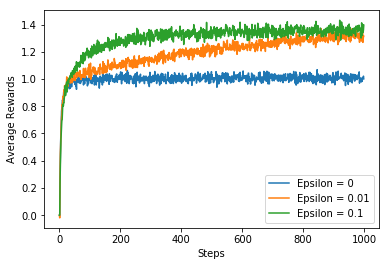

In [11]:
#%%plot graphs for average rewards
for reward in range(len(epsilon)):
    plt.plot(avg_reward[reward,:].T,label = 'Epsilon = ' + str(epsilon[reward]))
    plt.xlabel('Steps')
    plt.ylabel('Average Rewards')
    plt.legend()

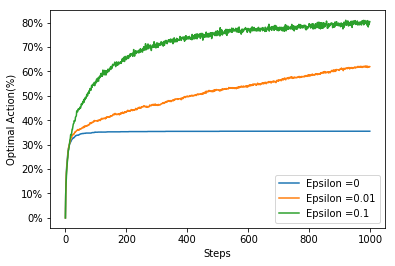

In [12]:
#%%plot graph of percentage of chossing optimal actions
for reward1 in range(len(epsilon)):
    ax = plt.plot(100*opt_act[reward1,:].T,label='Epsilon =' + str(epsilon[reward1]))
    plt.xlabel('Steps')
    plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
    plt.ylabel('Optimal Action(%)')
    plt.legend()